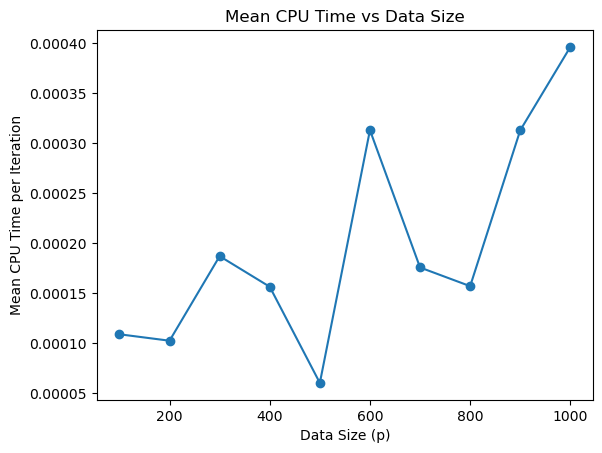

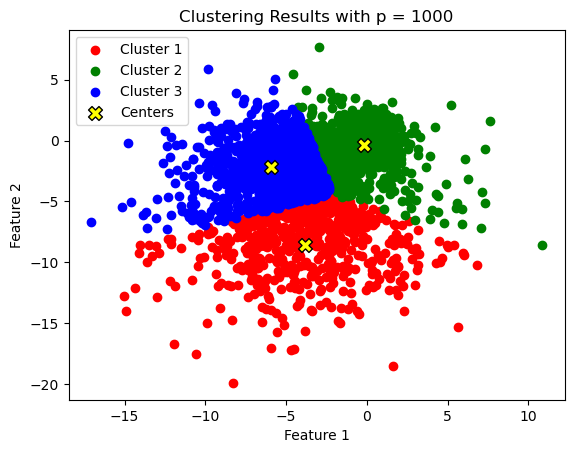

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_data(p):
    r1, r2 = np.random.normal(0, 1, (2, p))
    a = np.array([r1, r2]).T
    r3, r4 = np.random.normal(0, 1, (2, p))
    b = 4 * np.array([r3, r4]).T - np.array([4, 6])
    r5, r6 = np.random.normal(0, 1, (2, p))
    c = 2 * np.array([r5, r6]).T - np.array([5, 2])
    X = np.vstack((a,b,c))
    return X.T


def clustering(X, Z0 = None, opts = {'iter': 100, 'display': True}):
    """
    ----------------------------------------------------------------------------
    INPUT
    ----------------------------------------------------------------------------
      - X     (n x m) matrix containing the m different data points.
      - Z0    (n x k) initial points for the clusters (will be estimated by
                      Z0 = rand(n,3) if left empty).
      - opts  dict of options
                  iter       number of maximum iterations (default = 100).
                  display    print total distances (default = true).
    """
    n, m = X.shape

    # --------------------------------------------------------------------------
    # PROCESS INPUT AND OPTIONS
    # --------------------------------------------------------------------------

    if Z0 is None:
        k = 3
        Z0 = np.random.randn(n, k)
    else:
        k = Z0.shape[1]
    Z = Z0

    opts_alg = {}
    opts_alg['iter'] = opts.get('iter', 100)
    opts_alg['display'] = opts.get('display', True)

    sX = np.tile(X, (k, 1))

    # --------------------------------------------------------------------------
    # MAIN LOOP
    # --------------------------------------------------------------------------

    for i in range(opts_alg['iter']):
        # calculate distances
        sZ = np.abs(sX - np.tile(Z.flatten('F').reshape(n*k, 1, order='F'), (1, m))) ** 2
        sZ = np.sqrt(sum(sZ.reshape(n, m*k, order='F')))
        # select minimum distances
        sZ = sZ.reshape(k, m, order='F')
        mZ = np.min(sZ, axis=0)
        c = np.argmin(sZ, axis=0)
        # calculate new means
        for j in range(k):
            ind = (c == j)
            Z[:, j] = np.mean(X[:, ind], axis=1)

    # output
    if opts_alg['display']:
        s1 = np.sum(np.sum(mZ ** 2))
        s2 = s1 / (m*k)
        print('Total sum of distances = {:5.2f}; Weighted sum of distances = {:1.6e}'.format(s1, s2))

    return c, Z


data_sizes = [100*i for i in range(1, 11)]
cpu_times = []

for p in data_sizes:
    X = generate_data(p)
    Z0 = np.random.randn(X.shape[0], 3)
    start_time = time.time()
    clustering(X, Z0=Z0, opts={'iter': 100, 'display': False})
    end_time = time.time()
    cpu_times.append((end_time - start_time) / 100)

plt.scatter(data_sizes, cpu_times)
plt.plot(data_sizes, cpu_times)
plt.xlabel('Data Size (p)')
plt.ylabel('Mean CPU Time per Iteration')
plt.title('Mean CPU Time vs Data Size')
plt.show()

p = 1000 
X = generate_data(p)
Z0 = np.random.randn(X.shape[0], 3)

cluster_assignments, cluster_centers = clustering(X, Z0=Z0, opts={'iter': 100, 'display': False})

colors = ['r', 'g', 'b']
for i in range(3):
    cluster_data = X[:, cluster_assignments == i]
    plt.scatter(cluster_data[0], cluster_data[1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[0], cluster_centers[1], c='yellow', edgecolors='black', label='Centers', s=100, marker='X')

plt.title('Clustering Results with p = {}'.format(p))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()